# Analysis

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True
%matplotlib inline

In [2]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [3]:
import os
import xarray as xr
from src.constants import CMIP6_TS_PATH
from src.xr_utils import can_coords, clip, get_trend, spatial_mean, sel
from src.plot_utils import get_dim

In [4]:
xr.open_dataarray(CMIP6_TS_PATH / os.listdir(CMIP6_TS_PATH)[i])

FileNotFoundError: [Errno 2] No such file or directory: '/home/users/sithom/seager19/src/data/nc80'

In [267]:
def get_trends():
    """Get the 60 year trends over the nino3.4 region for differnt members of the nino3.4 ensemble."""
    tr_list = []
    fin_list = []
    for start, fin in [(x - 59, x) for x in range(2007, 2028)]:
        tr_list.append([])
        for i in range(len(os.listdir(CMIP6_TS_PATH))):
            ex = can_coords(
                xr.open_dataarray(CMIP6_TS_PATH / os.listdir(CMIP6_TS_PATH)[i])
            ).sel(T=slice(str(start), str(fin)))
            tr_list[-1].append(
                get_trend(spatial_mean(sel(ex, reg="nino3.4")), min_clim_f=True)
            )
        fin_list.append(fin)
    return xr.DataArray(
        tr_list,
        dims=["fin", "member"],
        coords=dict(fin=fin_list, member=os.listdir(CMIP6_TS_PATH)),
        attrs=dict(units="K", long_name="60 year trend in nino3.4"),
    )

In [138]:
tr_da = get_trends()

In [233]:
from src.constants import DATA_PATH
tr_da.to_netcdf(DATA_PATH / "ts_nino3.4_trends_ensemble.nc")

Text(0, 0.5, 'End year')

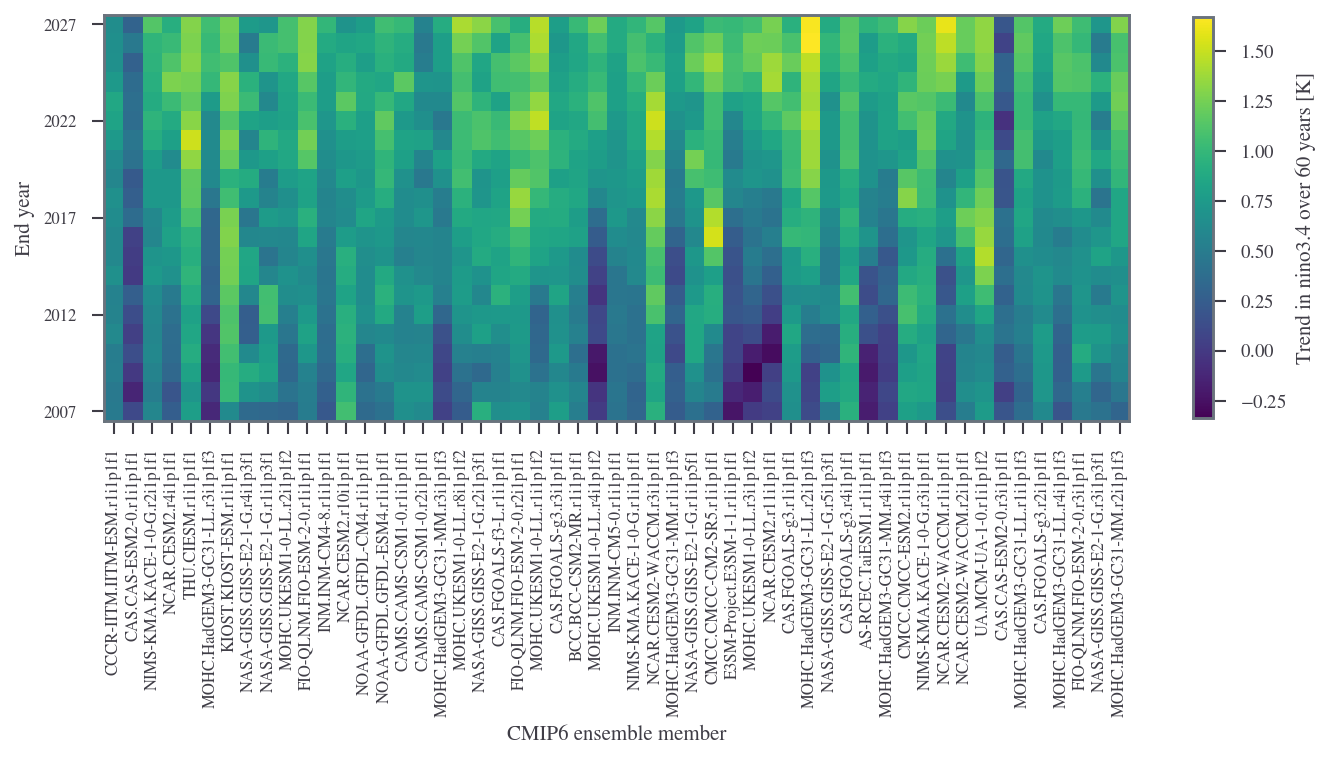

In [212]:
fig, ax = plt.subplots(1, figsize=get_dim(fraction_of_line_width=2))
plt.imshow(tr_da.values)
plt.colorbar(label="Trend in nino3.4 over 60 years [K]", shrink=0.52)
# plt.xlabel([str(x) for x in tr_da.member.values], list(range(len(tr_da.member.values))))
labels =[str(x).strip("ts.").strip(".80.nc") for x in tr_da.member.values]
locs = list(range(len(labels)))
ax.set_xticks(np.asarray(locs))
ax.set_xticklabels(np.asarray(labels), fontsize=8, rotation=90)
labels = [str(x) for x in tr_da.fin.values]
locs = list(range(0, len(labels), 5))
labels = [labels[x] for x in locs]
ax.set_yticks(np.asarray(locs))
ax.set_yticklabels(np.asarray(labels), fontsize=8,)#  rotation=90)
ax.invert_yaxis()
plt.xlabel("CMIP6 ensemble member")
plt.ylabel("End year")

mmm 0.757703735462886
tot num 53


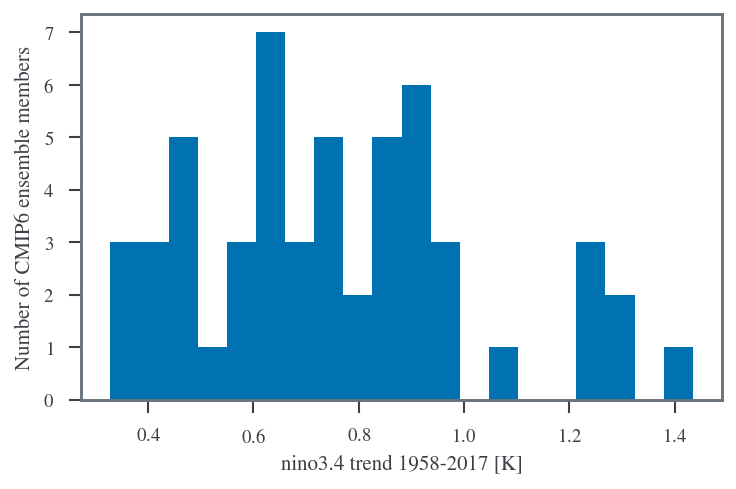

In [186]:
plt.hist(tr_da.sel(fin=2017).values, bins=20)
plt.xlabel("nino3.4 trend 1958-2017 [K]")
plt.ylabel("Number of CMIP6 ensemble members")
print("mmm", np.mean(tr_list))
print("tot num", len(tr_list))

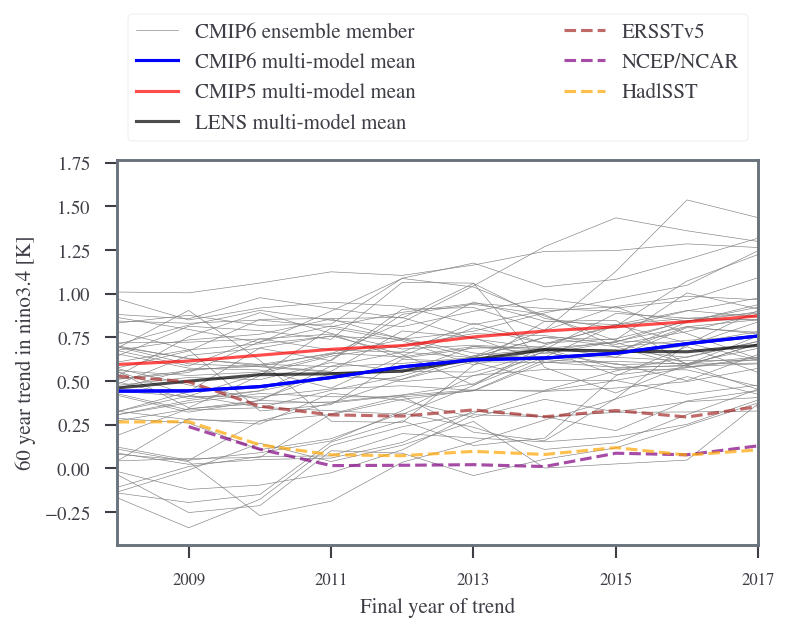

In [288]:
fig, ax = plt.subplots(1)

first = True
for mem in tr_da.member.values:
    if first:
        plt.plot(tr_da.sel(member=mem).values, linewidth=0.3, color="grey", label="CMIP6 ensemble member")
        first = False
    else:
        plt.plot(tr_da.sel(member=mem).values, linewidth=0.3, color="grey")


plt.plot(tr_da.mean("member").values, linewidth=1.5, label="CMIP6 multi-model mean", color="blue")

alpha = 0.7
linewidth = 1.5
linestr = "--"

plt.plot(
    CMIP5_MMM[:, 1] - 2007,
    CMIP5_MMM[:, 0],
    # linestr,
    color="red",
    label="CMIP5 multi-model mean",
    alpha=alpha,
    linewidth=linewidth,
)
plt.plot(
    LENS_MMM[:, 1]-2007,
    LENS_MMM[:, 0],
    # linestr,
    color="black",
    label="LENS multi-model mean",
    alpha=alpha,
    linewidth=linewidth,
)

plt.plot(
    ERSSTv5[:, 1] - 2007,
    ERSSTv5[:, 0],
    linestr,
    color="brown",
    label="ERSSTv5",
    alpha=alpha,
    linewidth=linewidth,
)
plt.plot(
    NCEP_NCAR[:, 1] - 2007,
    NCEP_NCAR[:, 0],
    linestr,
    color="purple",
    label="NCEP/NCAR",
    linewidth=linewidth,
    alpha=alpha,
)
plt.plot(
    HadlSST[:, 1]-2007,
    HadlSST[:, 0],
    linestr,
    color="orange",
    label="HadlSST",
    alpha=alpha,
    linewidth=linewidth,
)

plt.plot(tr_da.mean("member").values, linewidth=1.5, color="blue")
# plt.legend()
labels = [str(x) for x in tr_da.fin.values]
locs = list(range(len(labels)))
locs = list(range(0, len(labels), 2))
labels = [labels[x] for x in locs]
ax.set_xticks(np.asarray(locs))
ax.set_xticklabels(np.asarray(labels), fontsize=8) #, rotation=90)
plt.ylabel("60 year trend in nino3.4 [K]")
plt.xlabel("Final year of trend")
plt.xlim(1, 10)

plt.legend(
    bbox_to_anchor=(-0, 1.02, 1, 0.102),
    loc="lower left",
    mode="expand",
    ncol=2,
)

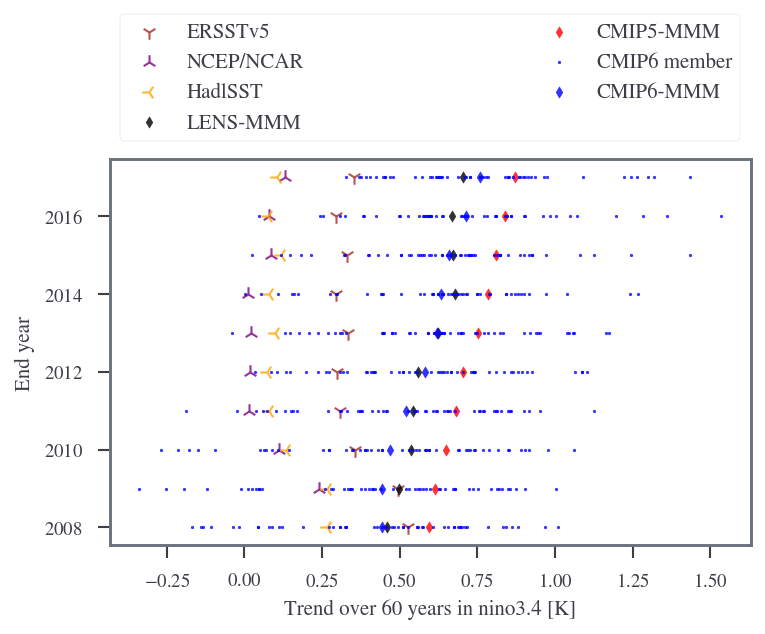

In [266]:
alpha = 0.8
plt.scatter(
    ERSSTv5[:, 0],
    ERSSTv5[:, 1],
    color="brown",
    marker="1",
    label="ERSSTv5",
    alpha=alpha,
)
plt.scatter(
    NCEP_NCAR[:, 0],
    NCEP_NCAR[:, 1],
    color="purple",
    marker="2",
    label="NCEP/NCAR",
    alpha=alpha,
)
plt.scatter(
    HadlSST[:, 0],
    HadlSST[:, 1],
    color="orange",
    marker="3",
    label="HadlSST",
    alpha=alpha,
)
plt.scatter(
    LENS_MMM[:, 0],
    LENS_MMM[:, 1],
    color="black",
    marker="d",
    label="LENS-MMM",
    s=15,
    alpha=alpha,
)
plt.scatter(
    CMIP5_MMM[:, 0],
    CMIP5_MMM[:, 1],
    color="red",
    marker="d",
    label="CMIP5-MMM",
    s=15,
    alpha=alpha,
)

first = True

for fin in range(2008, 2018):
    if first:
        plt.scatter(
            tr_da.sel(fin=fin).values,
            [fin for i in range(len(tr_da.sel(fin=fin).values))],
            marker=".",
            s=7,
            color="blue",
            alpha=alpha,
            label="CMIP6 member",
        )
        plt.scatter(
            tr_da.sel(fin=fin).mean("member").values,
            [fin],
            marker="d",
            s=15,
            color="blue",
            alpha=alpha,
            label="CMIP6-MMM",
        )
        first = False
    else:
        plt.scatter(
            tr_da.sel(fin=fin).values,
            [fin for i in range(len(tr_da.sel(fin=fin).values))],
            marker=".",
            s=7,
            color="blue",
            alpha=alpha,
        )
        plt.scatter(
            tr_da.sel(fin=fin).mean("member").values,
            [fin],
            marker="d",
            s=15,
            color="blue",
            alpha=alpha,
        )

plt.ylabel("End year")
plt.xlabel("Trend over 60 years in nino3.4 [K]")
plt.legend(
    bbox_to_anchor=(-0, 1.02, 1, 0.102),
    loc="lower left",
    mode="expand",
    ncol=2,
)

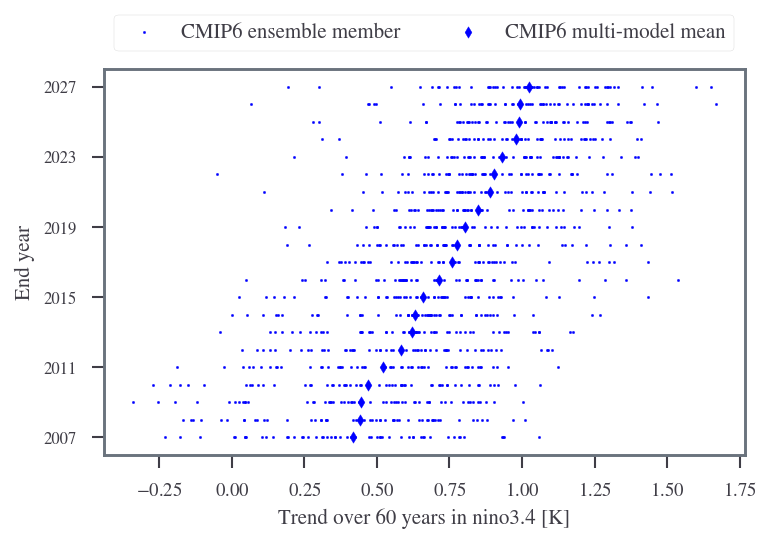

In [304]:
first = True
for fin in range(2007, 2028):
    if first:
        plt.scatter(
            tr_da.sel(fin=fin).values,
            [fin for i in range(len(tr_da.sel(fin=fin).values))],
            marker=".",
            s=5,
            color="blue",
            label="CMIP6 ensemble member",
        )
        plt.scatter(
            tr_da.sel(fin=fin).mean("member").values,
            [fin],
            marker="d",
            s=15,
            color="blue",
            label="CMIP6 multi-model mean",
        )
        first = False
    else:
        plt.scatter(
            tr_da.sel(fin=fin).values,
            [fin for i in range(len(tr_da.sel(fin=fin).values))],
            marker=".",
            s=5,
            color="blue",
        )
        plt.scatter(
            tr_da.sel(fin=fin).mean("member").values,
            [fin],
            marker="d",
            s=15,
            color="blue",
        )

plt.ylabel("End year")
plt.xlabel("Trend over 60 years in nino3.4 [K]")
labels = list(range(2007, 2028, 4))
ax = plt.gca()
ax.set_yticks(np.asarray(labels))
ax.set_yticklabels(np.asarray(labels), fontsize=8) 

plt.legend(
    bbox_to_anchor=(0.0, 1.02, 1, 0.102),
    loc="lower left",
    mode="expand",
    ncol=2,
)

In [259]:
HadlSST = np.asarray(
    [
        [0.26548672566371667, 2008],
        [0.2672566371681415, 2009],
        [0.13451327433628313, 2010],
        [0.07787610619469021, 2011],
        [0.07256637168141589, 2012],
        [0.09734513274336276, 2013],
        [0.079646017699115, 2014],
        [0.11858407079646016, 2015],
        [0.07610619469026542, 2016],
        [0.10619469026548667, 2017],
    ]
)

NCEP_NCAR = np.asarray(
    [
        [0.23893805309734506, 2009],
        [0.1097345132743362, 2010],
        [0.015929203539822967, 2011],
        [0.01769911504424776, 2012],
        [0.02123893805309729, 2013],
        [0.010619469026548645, 2014],
        [0.08672566371681412, 2015],
        [0.07787610619469021, 2016],
        [0.1292035398230088, 2017],
    ]
)

ERSSTv5 = np.asarray(
    [
        [0.527433628318584, 2008],
        [0.49557522123893794, 2009],
        [0.3557522123893805, 2010],
        [0.3061946902654866, 2011],
        [0.29911504424778745, 2012],
        [0.3345132743362831, 2013],
        [0.29557522123893787, 2014],
        [0.3309734513274335, 2015],
        [0.29380530973451324, 2016],
        [0.35398230088495564, 2017],
    ]
)


LENS_MMM = np.asarray(
    [
        [0.4601769911504424, 2008],
        [0.4991150442477875, 2009],
        [0.5362831858407078, 2010],
        [0.5415929203539822, 2011],
        [0.5575221238938052, 2012],
        [0.623008849557522, 2013],
        [0.6796460176991149, 2014],
        [0.6707964601769908, 2015],
        [0.6672566371681413, 2016],
        [0.7044247787610619, 2017],
    ]
)


CMIP5_MMM = np.asarray(
    [
        [0.5946902654867254, 2008],
        [0.6141592920353981, 2009],
        [0.647787610619469, 2010],
        [0.6814159292035397, 2011],
        [0.702654867256637, 2012],
        [0.7522123893805309, 2013],
        [0.7858407079646016, 2014],
        [0.8106194690265484, 2015],
        [0.8389380530973448, 2016],
        [0.8725663716814159, 2017],
    ]
)
